<a href="https://colab.research.google.com/github/darkhira/Transfer-Learning/blob/main/Transfer_Learning_TELEVISORES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Crear los directorios de las carpetas
!mkdir colchones
!mkdir s23
!mkdir televisores

In [10]:
#Descomprimimos los archivos zip en sus carpetas
%cd colchones
!unzip colchones.zip
%cd ..

%cd s23
!unzip s23.zip
%cd ..

%cd televisores
!unzip televisores.zip
%cd ..

/content/colchones
Archive:  colchones.zip
  inflating: image36.jpeg            
  inflating: image37.jpeg            
  inflating: image38.jpeg            
  inflating: image39.jpeg            
  inflating: image40.jpeg            
  inflating: image45.webp            
  inflating: IMG-PILLOW.jpg          
  inflating: Katherine-BeautyRest.jpg  
  inflating: luxury2-1.jpg           
  inflating: MoonCastle3.jpg         
  inflating: pagina04.jpg            
  inflating: PLU--1424651.jpg        
  inflating: Premium-lexus.jpg       
  inflating: -SIGNATURE-1-NEW.jpg    
  inflating: SPARTA-CLASIC-1-scaled.jpg  
  inflating: SPARTA-CLASIC-2-scaled.jpg  
  inflating: Titanium-Especial-1.jpg  
  inflating: 1-NEW-SUPREME-SP-PDP-2022.jpg  
  inflating: 1-PORTADA-AIR-RELAX-ATENEA.png  
  inflating: 8-scaled.jpg            
  inflating: 450.0000-37.png         
  inflating: 450.0000-38-1.png       
  inflating: 3287391801.jpg          
  inflating: ambiente-Colchon-Happy-Kids.jpg  
  inflatin

In [11]:
#Borramos los archivos ZIP
!rm -rf /content/colchones/colchones.zip
!rm -rf /content/s23/s23.zip
!rm -rf /content/televisores/televisores.zip


In [12]:
#Mostrar cuantas imagenes tengo en cada categoria
!ls /content/colchones | wc -l #97
!ls /content/s23        | wc -l #130
!ls /content/televisores | wc -l #108

97
130
108


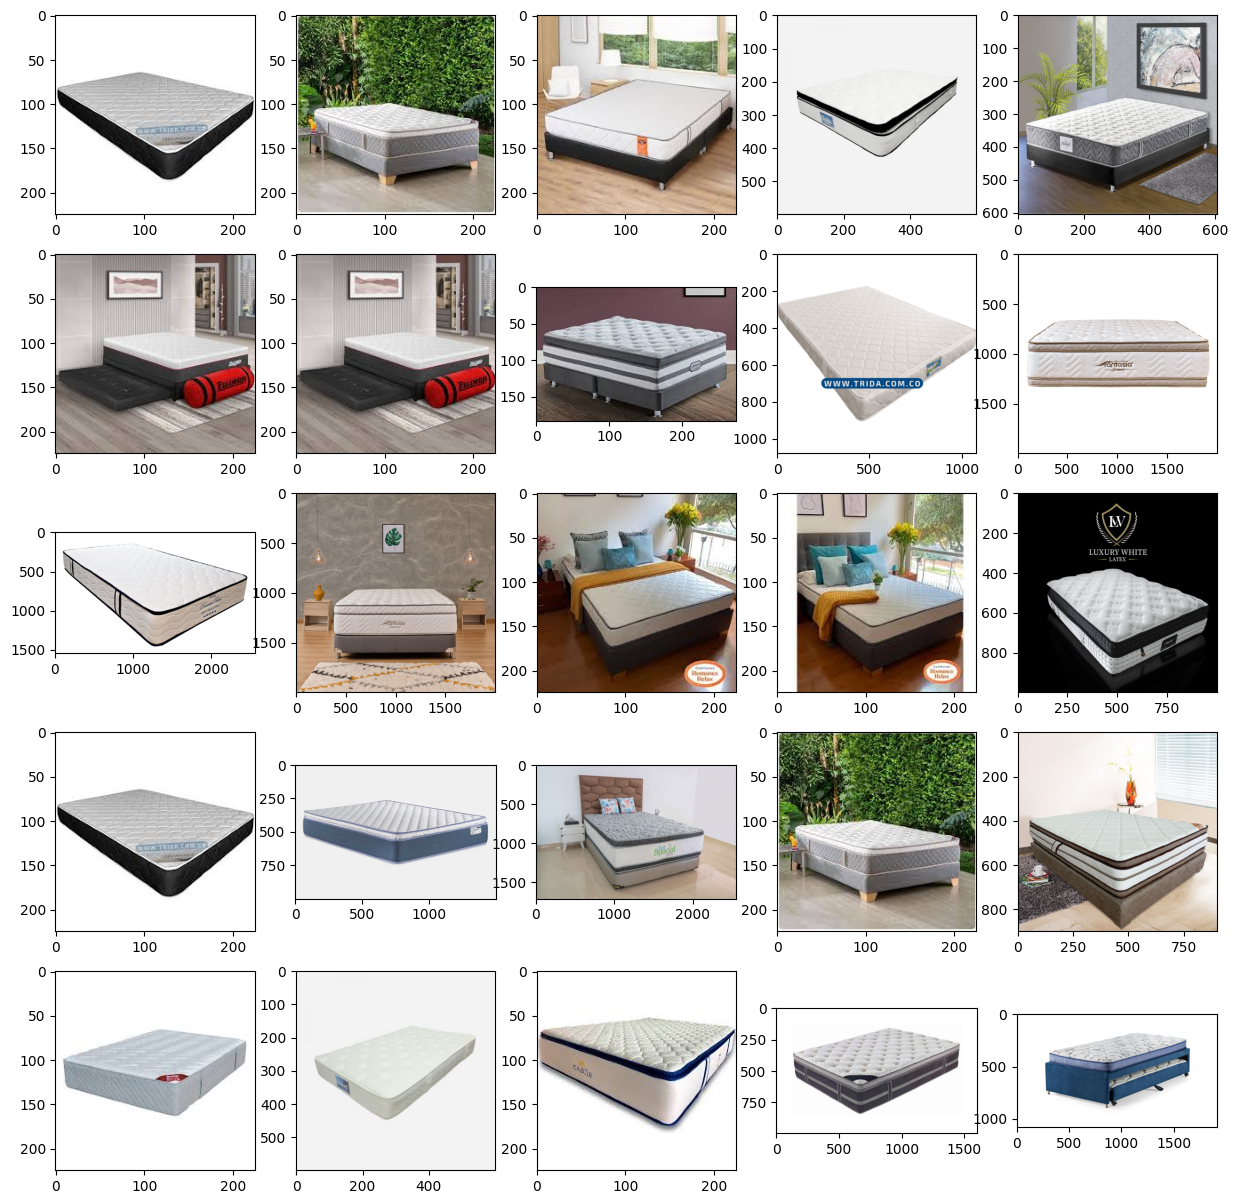

In [19]:
#Mostrar algunas imagenes con pyplot y nombrarlas para luego cambiarlas de carpeta si es necesario.
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))
carpeta= '/content/colchones'
imagenes = os.listdir(carpeta)

for i,nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta+'/'+nombreimg)
  plt.imshow(imagen)

In [6]:
#Crear carpetas para hacer el set de datos
!mkdir dataset
!mkdir dataset/colchones
!mkdir dataset/s23
!mkdir dataset/televisores

In [20]:
#Copíar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#Maximo 97 (El numero menor de las imagenes que subimos)

import shutil
carpeta_fuente = '/content/colchones'
carpeta_destino = '/content/dataset/colchones'

for i, nombreimg in enumerate(imagenes):
  if i< 97:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

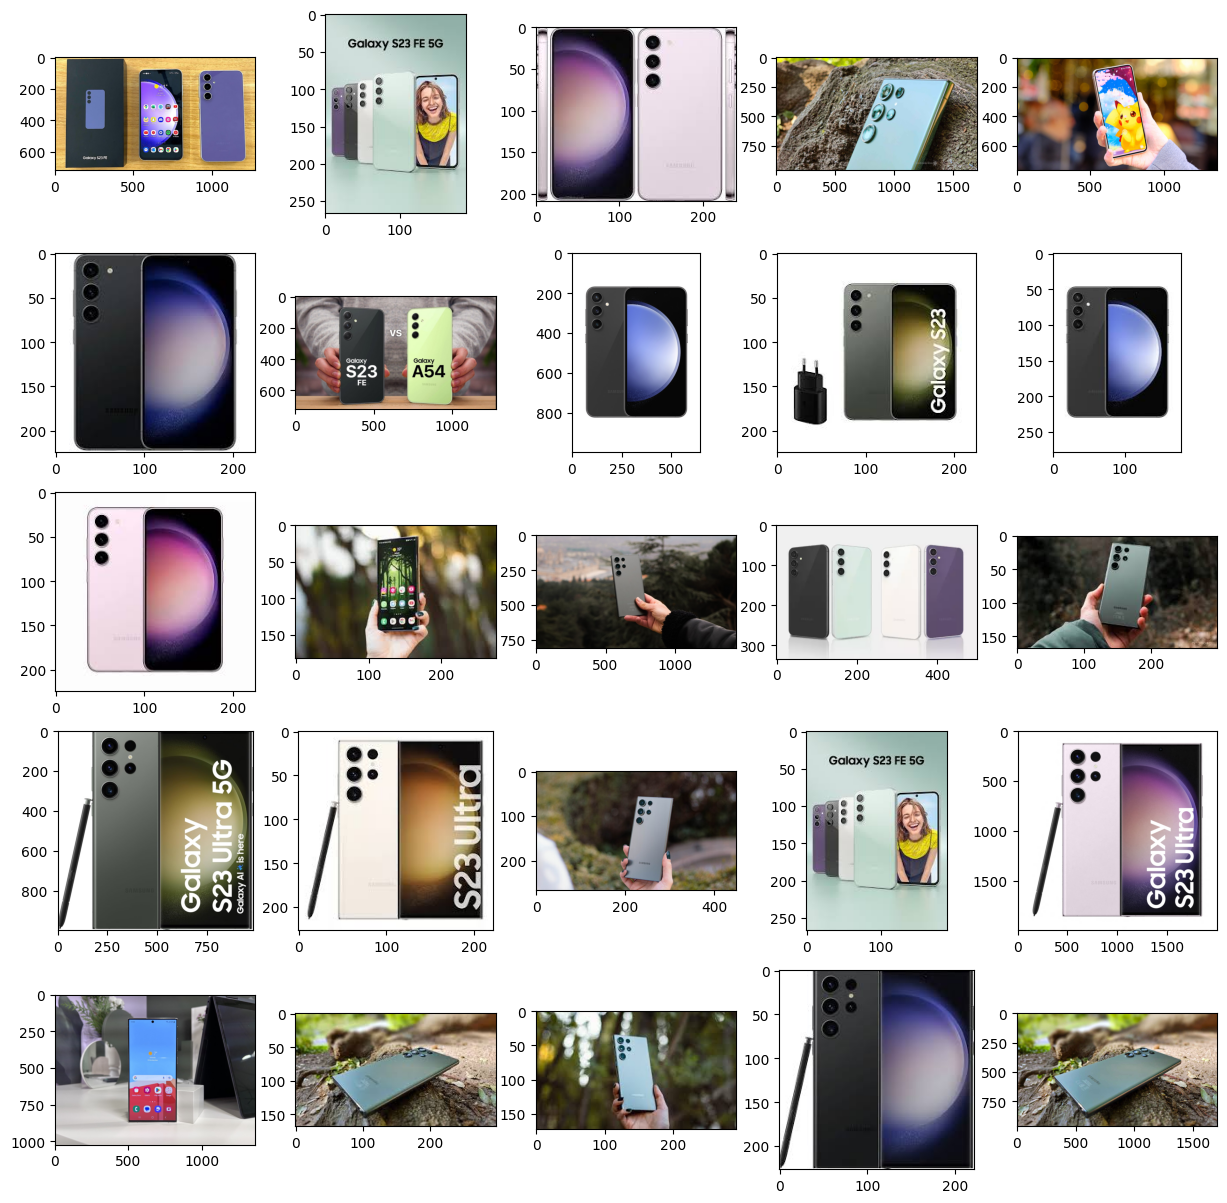

In [14]:
plt.figure(figsize=(15,15))
carpeta= '/content/s23'
imagenes = os.listdir(carpeta)

for i,nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta+'/'+nombreimg)
  plt.imshow(imagen)

import shutil
carpeta_fuente = '/content/s23'
carpeta_destino = '/content/dataset/s23'

for i, nombreimg in enumerate(imagenes):
  if i< 97:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

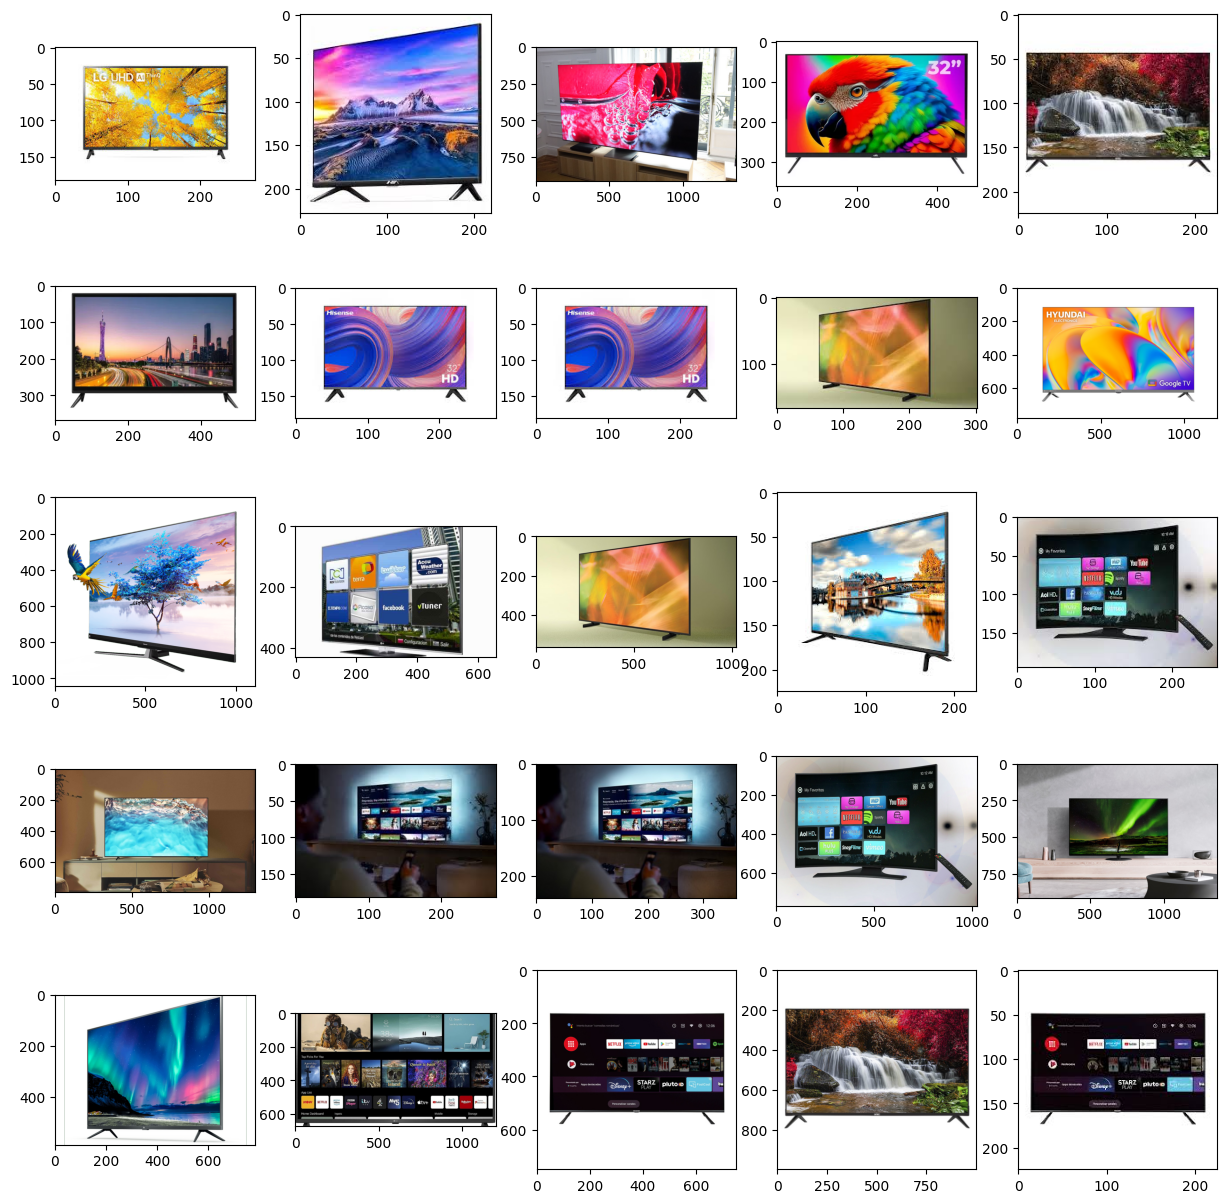

In [15]:
plt.figure(figsize=(15,15))
carpeta= '/content/televisores'
imagenes = os.listdir(carpeta)

for i,nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta+'/'+nombreimg)
  plt.imshow(imagen)

import shutil
carpeta_fuente = '/content/televisores'
carpeta_destino = '/content/dataset/televisores'

for i, nombreimg in enumerate(imagenes):
  if i< 97:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [21]:
#Mostrar el numero de imagenes ya ordenadas
!ls /content/dataset/colchones | wc -l
!ls /content/dataset/s23 | wc -l
!ls /content/dataset/televisores | wc -l

97
97
97


Found 219 images belonging to 3 classes.
Found 52 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


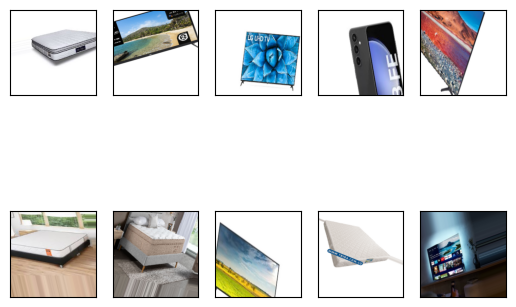

In [22]:
#Aumenta de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas y dejando un 80% para entrenar
)

#Generadores para sets de entrenamiento y de pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [23]:
import tensorflow as tf
import tensorflow_hub as hub

url = 'https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4'
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [24]:
#Congelar el modelo descargado(todos sus parametros)
mobilenetv2.trainable = False

In [25]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

In [26]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [27]:
#compilar como siempre
modelo.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
7/7 [==============================] - 18s 1s/step - loss: 1.0517 - accuracy: 0.5068 - val_loss: 0.6389 - val_accuracy: 0.7885
Epoch 2/50
7/7 [==============================] - 6s 955ms/step - loss: 0.5074 - accuracy: 0.8630 - val_loss: 0.3382 - val_accuracy: 0.9038
Epoch 3/50
7/7 [==============================] - 5s 713ms/step - loss: 0.2917 - accuracy: 0.9132 - val_loss: 0.2535 - val_accuracy: 0.9231
Epoch 4/50
7/7 [==============================] - 5s 710ms/step - loss: 0.2034 - accuracy: 0.9498 - val_loss: 0.1456 - val_accuracy: 0.9808
Epoch 5/50
7/7 [==============================] - 5s 771ms/step - loss: 0.1675 - accuracy: 0.9680 - val_loss: 0.1450 - val_accuracy: 0.9615
Epoch 6/50
7/7 [==============================] - 5s 673ms/step - loss: 0.1290 - accuracy: 0.9726 - val_loss: 0.1914 - val_accuracy: 0.9231
Epoch 7/50
7/7 [==============================] - 6s 875ms/step - loss: 0.1081 - accuracy: 0.9863 - val_loss: 0.1627 - val_accuracy: 0.9231
Epoch 8/50
7/7 [======

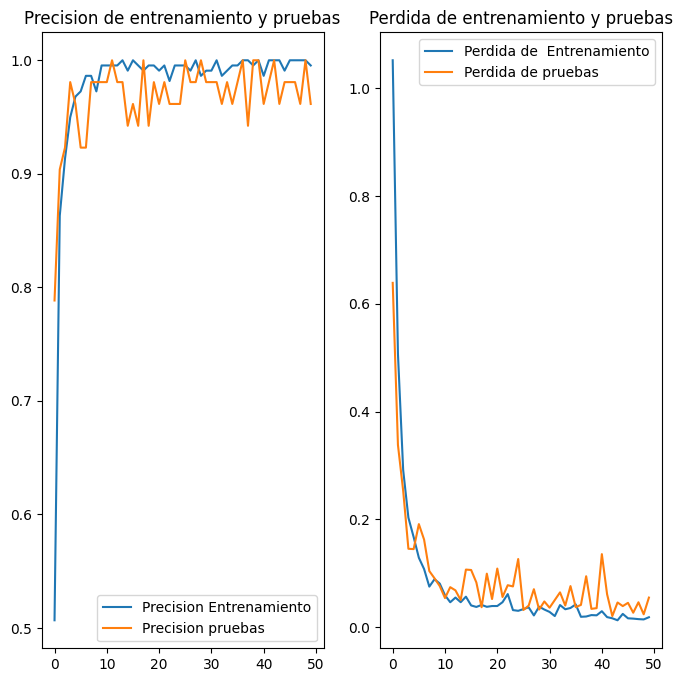

In [29]:
#Graficas de precision
acc= historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss =historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precision Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precision pruebas')
plt.legend(loc='lower right')
plt.title('Precision de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Perdida de  Entrenamiento')
plt.plot(rango_epocas, val_loss, label='Perdida de pruebas')
plt.legend(loc='upper right')
plt.title('Perdida de entrenamiento y pruebas')
plt.show()

In [30]:
from urllib import request
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [31]:
#0 = colchones, 1=s23, 2 = televisores
url= 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxn8wpjTjy0ZsO1yy9-W0VgzJqFTyFoW81wt9z_yYr8g&s'
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 1s 1s/step
2
